# Load variables

In [5]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pingouin as pg

# Read data
df_all = pd.read_csv('all_annotations.csv')
df = pd.read_csv('feedback.csv')

# Helpful ordering and names
stim_order=['Cntrl', 'Near', 'Far']
stim_names = ['Control', 'Near', 'Far']

feedback_order = ['feedback_relevant', 'feedback_useful', 'feedback_novelty', 'feedback_quality']
feedback_names = ['Relevancy', 'Usefulness', 'Novelty ', 'Quality']

# Set prefs
sns.set(font_scale=1.5)
sns.set_style("ticks")

# Define 9 colors from 'GnBu'
colors = sns.color_palette('GnBu',9)

# Bold typeset in terminal
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

# Questionnaire data

## Basic measures

median    68.500000
mean      78.666667
std       32.647880
Name: idea_total, dtype: float64 



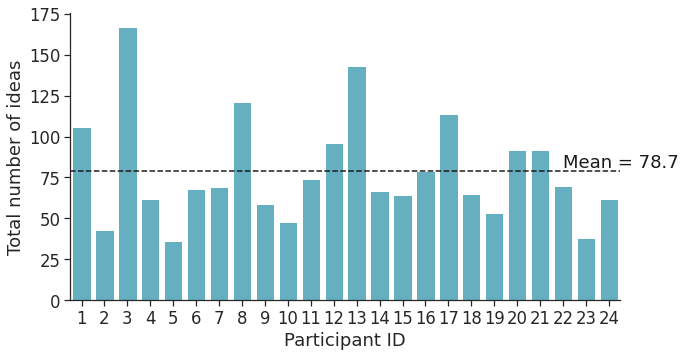

In [9]:
# Ideas per participant

idea_participants = df.groupby(by=['participant_id'])['idea_total'].sum().reset_index()
idea_participant_mean = idea_participants['idea_total'].mean()

print(idea_participants['idea_total'].agg(['median','mean', 'std']), '\n')

g = sns.catplot(kind='bar', data=idea_participants, x='participant_id', y='idea_total', color=colors[5],aspect=1.75)
g.set(xlabel='Participant ID', ylabel='Total number of ideas')
g.ax.axhline(idea_participant_mean, color='k', linestyle='--') 
g.ax.text(21,81,f'Mean = {round(idea_participant_mean,1)}', color='k')
g.savefig('mean_ideas_participants.pdf', dpi=300)

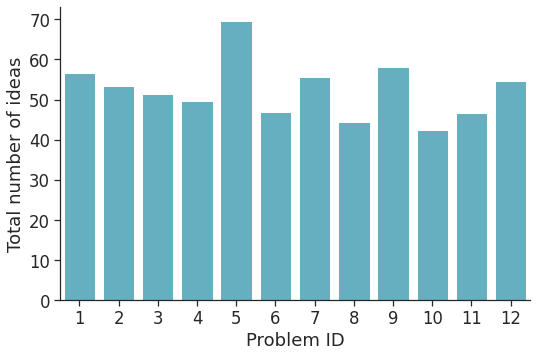

In [11]:
# Ideas per problem

idea_problems = df.groupby(by=['stimuli','problem_id'])['idea_total'].sum().reset_index()
idea_problem_mean = idea_problems['idea_total'].mean()

g = sns.catplot(kind='bar',data=idea_problems, x='problem_id', y='idea_total', aspect=1.5, color=colors[5], ci=None)
g.set(xlabel='Problem ID', ylabel='Total number of ideas')
# g.plot([0,11], [idea_problem_mean,idea_problem_mean], 'black')

g.savefig('mean_ideas_problem.pdf', dpi=300)

## Mean values of questionnaire 

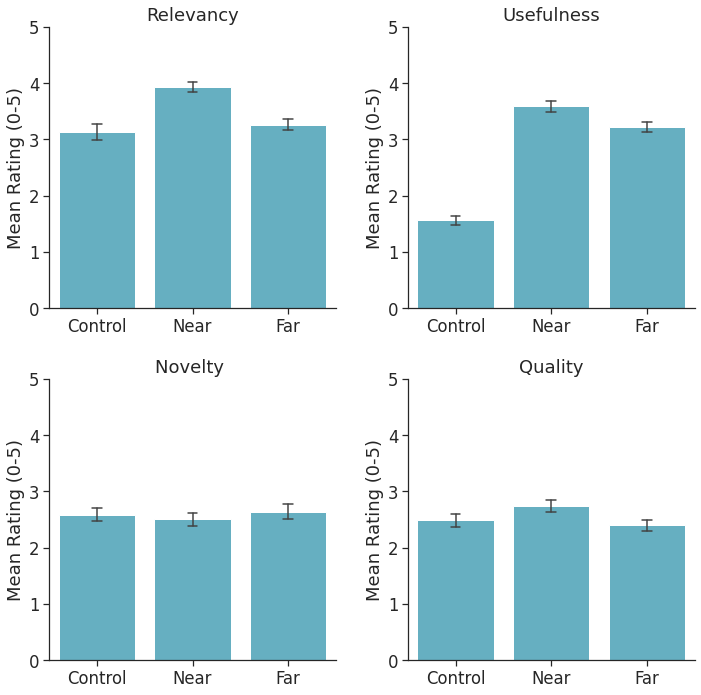

In [59]:
# Plot each question score across stimuli

# Convert to long format
df_melt = df.melt(id_vars=['participant_id', 'stimuli', 'group_id'], value_vars=feedback_order)


g = sns.catplot(data=df_melt, x='stimuli', y='value', kind='bar', col='variable',color=colors[5],ci=68, 
                col_wrap=2, order=stim_order, col_order=feedback_order, sharex=False, sharey=False, capsize=0.1, errwidth=1.5)
g.set(ylim=(0,5), xticklabels=stim_names)
g.fig.subplots_adjust(hspace=0.25, wspace=0.25)


for i, ax in enumerate(g.axes.flat): 
  ax.set_title(feedback_names[i])
  ax.set_xlabel('') 
  ax.set_ylabel('Mean Rating (0-5)')


g.savefig('mean_questionnaire.pdf', dpi=300)

## Likert scatter plots
Ideas are binned in quintiles (5 equal sized bins)

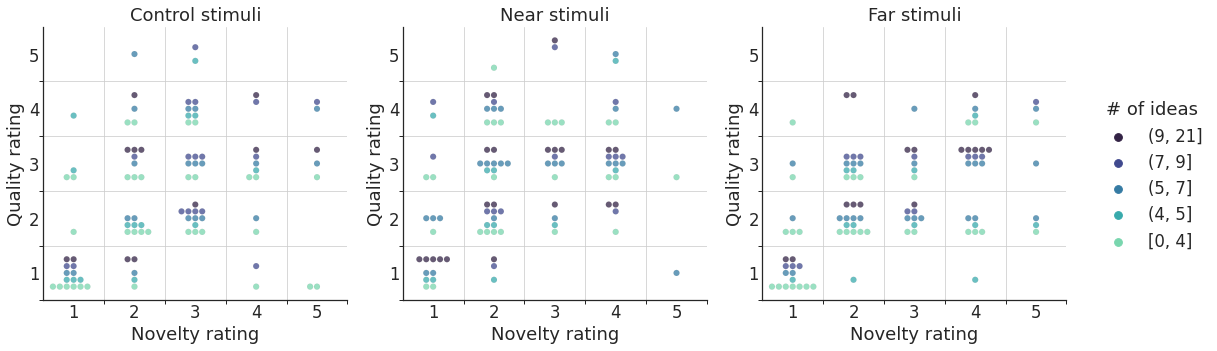

In [58]:
# Plot novelty/quality score (self-ratings) vs. number of ideas

df_mod = df.copy() # Copy of df


_, edges = pd.qcut(df['idea_total'], 5, precision=0, retbins=True)
labels = [f'({abs(edges[i]):.0f}, {edges[i+1]:.0f}]' for i in range(len(edges)-1)]
labels[0] = '['+labels[0][1:] # Inclusive 0

df_mod['idea_total_bin'] = pd.qcut(df['idea_total'], 5, precision=0, labels=labels)
df_mod['feedback_quality_jitter'] = 0.125 * ((pd.qcut(df['idea_total'], 5, precision=0, labels=False)) - 2) + df['feedback_quality']


f = sns.catplot(kind='swarm', data=df_mod, x='feedback_novelty', y='feedback_quality_jitter', hue='idea_total_bin', col='stimuli',
                palette='mako', s=6, legend_out=True, alpha=0.75, sharey=False, linewidth=0.05, col_order=stim_order, hue_order=labels[::-1])
f.set_axis_labels('Novelty rating', 'Quality rating')
# f._legend.set_title('# Ideas')
f._legend.set_title('# of ideas')
f.set(ylim=(0.5,5.5))

minor_ticks = np.arange(0.5, 5, 1)

for i, ax in enumerate(f.axes.flat):
  ax.set_title(stim_names[i] + ' stimuli')
  ax.set_ylabel('Quality rating')

  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(minor_ticks, minor=True)
  ax.tick_params(axis='both', which='major', length=0)

  ax.grid(which='minor', alpha=0.75)

f.savefig('idea_self_feedback_quintiles.pdf',dpi=300, bbox_inches='tight')



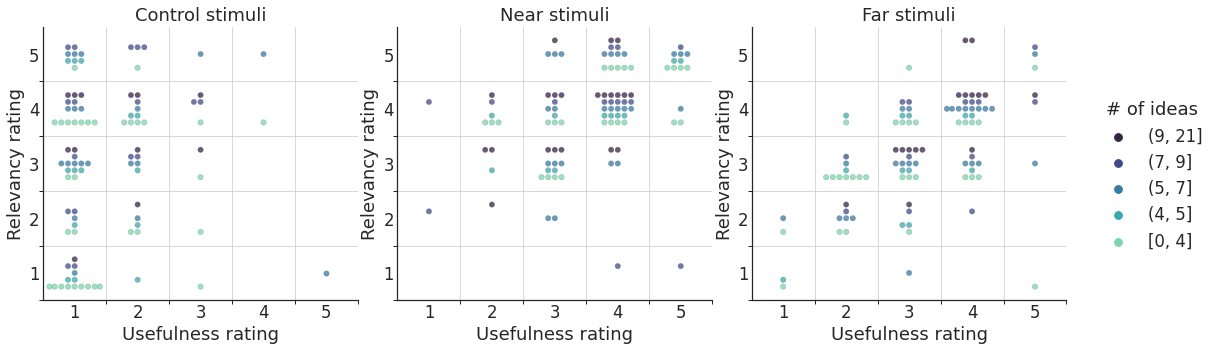

In [60]:
# Plot relevancy/useful score (stimuli ratings) vs. number of ideas

df_mod = df.copy() # Copy of df


_, edges = pd.qcut(df['idea_total'], 5, precision=0, retbins=True)
labels = [f'({abs(edges[i]):.0f}, {edges[i+1]:.0f}]' for i in range(len(edges)-1)]
labels[0] = '['+labels[0][1:] # Inclusive 0

df_mod['idea_total_bin'] = pd.qcut(df['idea_total'], 5, precision=0, labels=labels)
df_mod['feedback_relevant_jitter'] = 0.125 * ((pd.qcut(df['idea_total'], 5, precision=0, labels=False)) - 2) + df['feedback_relevant']


f = sns.catplot(kind='swarm', data=df_mod, x='feedback_useful', y='feedback_relevant_jitter', hue='idea_total_bin', col='stimuli',
                palette='mako', s=5.5, legend_out=True, alpha=0.75, sharey=False, linewidth=0.15, col_order=stim_order, hue_order=labels[::-1])
f.set_axis_labels('Usefulness rating', 'Relevancy rating')
# f._legend.set_title('# Ideas')
f._legend.set_title('# of ideas')
f.set(ylim=(0.5,5.5))

minor_ticks = np.arange(0.5, 5, 1)

for i, ax in enumerate(f.axes.flat):
  ax.set_title(stim_names[i] + ' stimuli')
  ax.set_ylabel('Relevancy rating')

  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(minor_ticks, minor=True)
  ax.tick_params(axis='both', which='major', length=0)

  ax.grid(which='minor', alpha=0.75)

f.savefig('idea_feedback_quintiles.pdf',dpi=300, bbox_inches='tight')



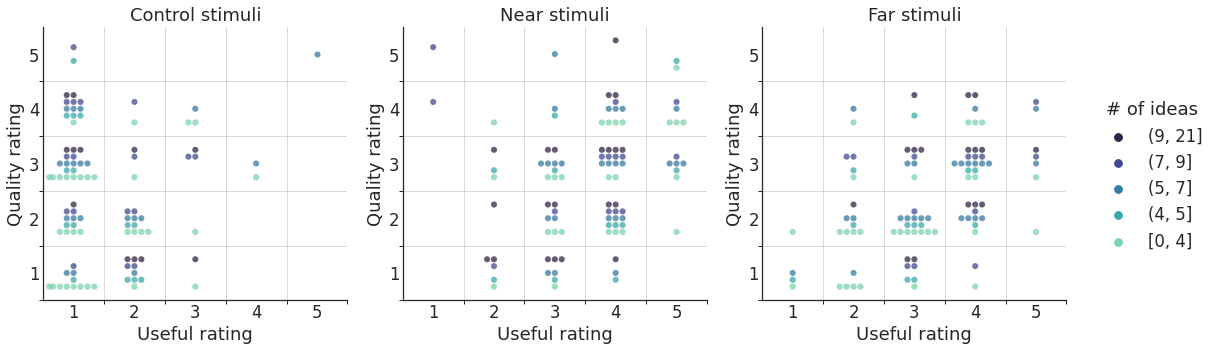

In [5]:


df_mod = df.copy() # Copy of df


_, edges = pd.qcut(df['idea_total'], 5, precision=0, retbins=True)
labels = [f'({abs(edges[i]):.0f}, {edges[i+1]:.0f}]' for i in range(len(edges)-1)]
labels[0] = '['+labels[0][1:] # Inclusive 0

df_mod['idea_total_bin'] = pd.qcut(df['idea_total'], 5, precision=0, labels=labels)
df_mod['feedback_quality_jitter'] = 0.125 * ((pd.qcut(df['idea_total'], 5, precision=0, labels=False)) - 2) + df['feedback_quality']


f = sns.catplot(kind='swarm', data=df_mod, x='feedback_useful', y='feedback_quality_jitter', hue='idea_total_bin', col='stimuli',
                palette='mako', s=6, legend_out=True, alpha=0.75, sharey=False, linewidth=0.05, col_order=stim_order, hue_order=labels[::-1])
f.set_axis_labels('Usefulness rating', 'Quality rating')
# f._legend.set_title('# Ideas')
f._legend.set_title('# of ideas')
f.set(ylim=(0.5,5.5))

minor_ticks = np.arange(0.5, 5, 1)

for i, ax in enumerate(f.axes.flat):
  ax.set_title(stim_names[i] + ' stimuli')
  ax.set_ylabel('Quality rating')

  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(minor_ticks, minor=True)
  ax.tick_params(axis='both', which='major', length=0)

  ax.grid(which='minor', alpha=0.75)

f.savefig('idea_plot_quintiles.pdf',dpi=300, bbox_inches='tight')



## Pairplots for each stimuli of questionnaire


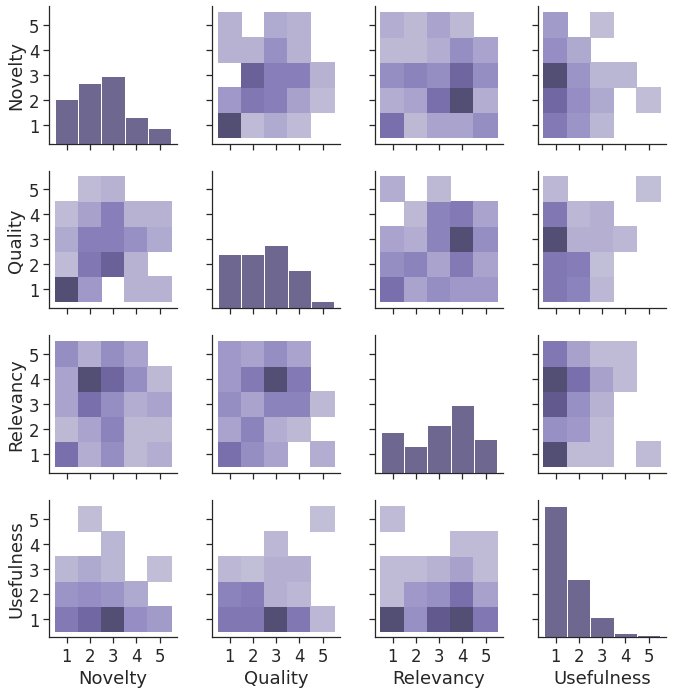

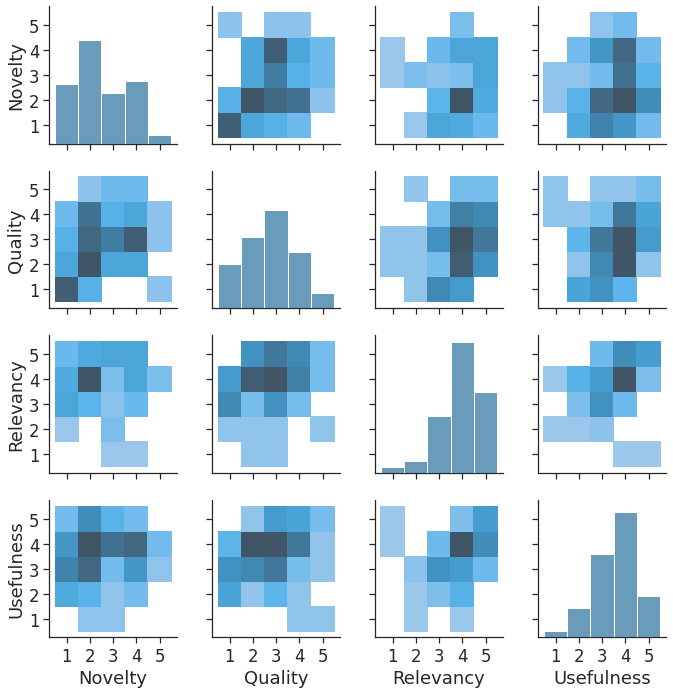

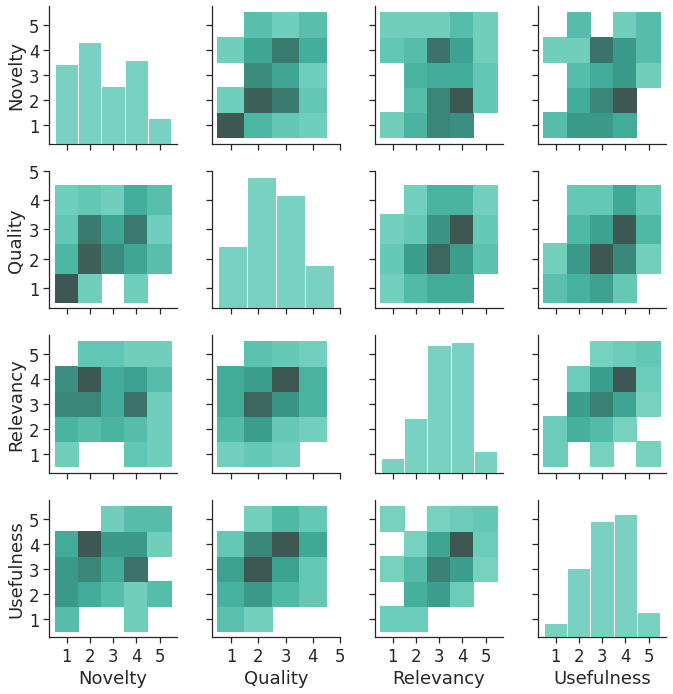

In [13]:
color = iter(sns.color_palette('mako',3))

for stim in stim_order:
  # c = next(color)
  c = next(color)

  df_pair = df[df.stimuli == stim].iloc[:,4:-1]
  df_pair.columns = ['Novelty', 'Quality', 'Relevancy', 'Usefulness']

  g = sns.PairGrid(df_pair)
  g.map_diag(sns.histplot, discrete=True, color=c)
  g.map_offdiag(sns.histplot, discrete=True, color=c)
  g.set(xticks=list(range(1,6)), yticks=list(range(1,6)))
  # g.savefig(f'pairplot_{stim.lower()}.pdf', dpi=300, bbox_inches='tight')

## Statistics on questionnaire means

In [47]:
# Statistics to check significance between stimuli for questionnaire

# for feedback in feedback_order:
#   print(f"{BOLD}{feedback.split('_')[1].capitalize()}:{END}")
#   fr = pg.friedman(data=df, dv=feedback, subject='participant_id', within='stimuli')
#   pg.print_table(fr)
# print('\n')

for feedback in feedback_order:
  print(f"\n{BOLD}{feedback.split('_')[1].capitalize()}:{END}")
  pg.print_table(pg.pairwise_ttests(data=df, dv=feedback, within='stimuli', subject='participant_id', parametric=False, padjust='bonf'))



Relevant:

POST HOC TESTS

Contrast    A      B     Paired    Parametric      W-val  Tail         p-unc    p-corr  p-adjust      hedges
----------  -----  ----  --------  ------------  -------  ---------  -------  --------  ----------  --------
stimuli     Cntrl  Far   True      False         126.000  two-sided    0.726     1.000  bonf          -0.148
stimuli     Cntrl  Near  True      False          51.000  two-sided    0.015     0.044  bonf          -0.886
stimuli     Far    Near  True      False           3.000  two-sided    0.000     0.000  bonf          -1.034


Useful:

POST HOC TESTS

Contrast    A      B     Paired    Parametric      W-val  Tail         p-unc    p-corr  p-adjust      hedges
----------  -----  ----  --------  ------------  -------  ---------  -------  --------  ----------  --------
stimuli     Cntrl  Far   True      False           0.000  two-sided    0.000     0.000  bonf          -2.694
stimuli     Cntrl  Near  True      False           0.000  two-sided    0.

## Idea histograms

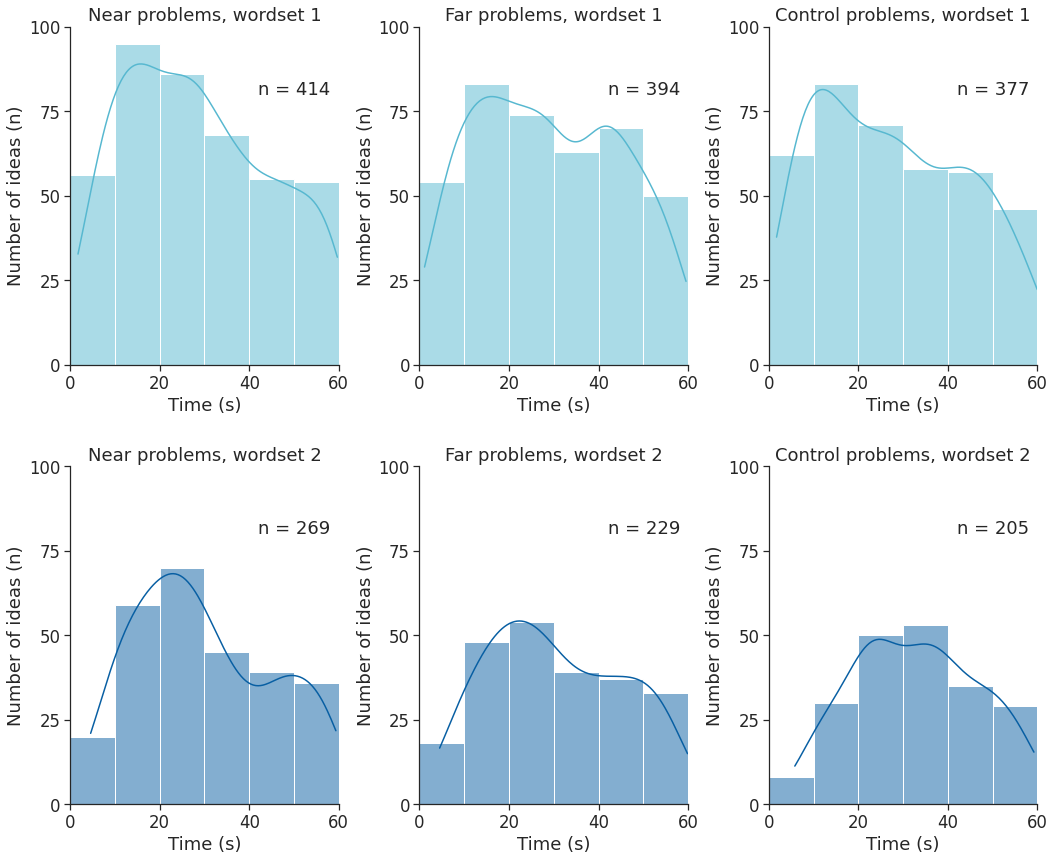

In [50]:
# Plot histograms/kdes

def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(0.7, 0.8, f"n = {n}", transform=ax.transAxes)


df_hist = df_all[df_all.label == 'idea']

hist_stim_order = ['Near','Far','Cntrl']
hist_stim_names = ['Near','Far','Control']

d = {'color': [colors[5], colors[8]]}
g = sns.FacetGrid(df_hist, col="stimuli", row="wordset", hue='wordset', hue_kws=d, sharex=False, sharey=False, col_order=hist_stim_order, height=6, aspect=0.8)
g.map_dataframe(sns.histplot, x="idea_timestamp", binwidth=10, binrange=(0,60), kde=True)
g.map_dataframe(annotate)
g.set(xlim=(0, 60), ylim=(0, 100), xticks=np.arange(0,61,20), yticks=np.arange(0,101,25), ylabel='Number of ideas (n)', xlabel='Time (s)')
g.fig.subplots_adjust(hspace=0.3, wspace=0.3)


for i, ax in enumerate(g.axes.flat):
  ax.set_title(f'{hist_stim_names[i%3]} problems, wordset {i//3 + 1}')

g.savefig('idea_historgrams.pdf', dpi=300)

## Idea statistics

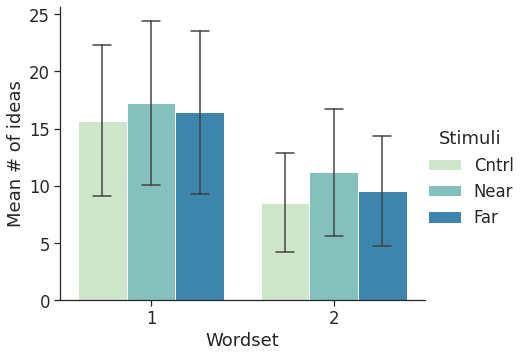

In [23]:
# Mean and std for idea fluency across all stim problems, for wordset and stims
df_sum_stim = df_all.groupby(by=['participant_id', 'wordset', 'stimuli'])['idea_total'].sum().reset_index()

g = sns.catplot(kind='bar', data=df_sum_stim, x='wordset', y='idea_total', hue='stimuli', ci='sd', palette='GnBu', capsize=0.1, errwidth=1.5, hue_order=stim_order, aspect=1.2)
g.set(xticklabels=[1, 2], xlabel='Wordset', ylabel='Mean # of ideas')
g._legend.set_title('Stimuli')

# g.savefig('mean_sd_ideas.pdf', dpi=300, bbox_inches='tight')

In [37]:
idea_fluency = df_sum_stim.groupby(by=['wordset','stimuli']).agg({'idea_total':['size', 'mean', 'std']}).round(2)
idea_fluency

idea_total             
                      size   mean   std
wordset stimuli                        
1.0     Cntrl           24  15.71  6.77
        Far             24  16.42  7.25
        Near            24  17.25  7.34
2.0     Cntrl           24   8.54  4.43
        Far             24   9.54  4.90
        Near            24  11.21  5.67

In [39]:
# Statistical significance of stimuli within wordset using ANOVA (repeated measures one-way) - test for normality and sphereicity
print(BOLD,'Wordset 1',END)
# pg.print_table(pg.rm_anova(data=df_sum_stim[df_sum_stim['wordset'] == 1.0], dv='idea_total', subject='participant_id', within='stimuli'))
pg.print_table(pg.pairwise_ttests(data=df_sum_stim[df_sum_stim['wordset'] == 1.0], dv='idea_total', within='stimuli', padjust='bonf', subject='participant_id'))  


# print(pg.sphericity(df_sum_stim[df_sum_stim['wordset'] == 1.0], dv='idea_total', subject='participant_id',within='stimuli'))
# pg.print_table(pg.normality(df_sum_stim[df_sum_stim['wordset'] == 1.0], dv='idea_total', group='stimuli', method='shapiro', alpha=0.05))

print('\n\n\n',BOLD+'Wordset 2'+END)
# pg.print_table(pg.rm_anova(data=df_sum_stim[df_sum_stim['wordset'] == 2.0], dv='idea_total', subject='participant_id', within='stimuli'))
pg.print_table(pg.pairwise_ttests(data=df_sum_stim[df_sum_stim['wordset'] == 2.0], dv='idea_total', within='stimuli', padjust='bonf', subject='participant_id'))  


# print(pg.sphericity(df_sum_stim[df_sum_stim['wordset'] == 2.0], dv='idea_total', subject='participant_id',within='stimuli'))
# pg.print_table(pg.normality(df_sum_stim[df_sum_stim['wordset'] == 2.0], dv='idea_total', group='stimuli', method='shapiro', alpha=0.05))

 Wordset 1 

POST HOC TESTS

Contrast    A      B     Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust      BF10    hedges
----------  -----  ----  --------  ------------  ------  ------  ---------  -------  --------  ----------  ------  --------
stimuli     Cntrl  Far   True      True          -1.026  23.000  two-sided    0.315     0.946  bonf         0.344    -0.099
stimuli     Cntrl  Near  True      True          -2.157  23.000  two-sided    0.042     0.125  bonf         1.502    -0.215
stimuli     Far    Near  True      True          -1.069  23.000  two-sided    0.296     0.888  bonf         0.358    -0.112




 Wordset 2

POST HOC TESTS

Contrast    A      B     Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust      BF10    hedges
----------  -----  ----  --------  ------------  ------  ------  ---------  -------  --------  ----------  ------  --------
stimuli     Cntrl  Far   True      True          -1.906  23.000  two-si

In [40]:
# Statistics to check significance between wordsets for each stim

for stim in stim_order:
  print(f"\n\033[1m{stim}:\033[0m")
  anova = pg.rm_anova(data=df_sum_stim[df_sum_stim.stimuli == stim], dv='idea_total', subject='participant_id', within='wordset')
  pg.print_table(anova)

  # print(pg.sphericity(data=df_sum_stim[df_sum_stim.stimuli == stim], dv='idea_total', subject='participant_id', within='wordset'))
  # pg.print_table(pg.normality(df_sum_stim[df_sum_stim.stimuli == stim], dv='idea_total', group='wordset'))


Cntrl:

ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    np2    eps
--------  -------  -------  ------  -------  -----  -----
wordset         1       23  52.567    0.000  0.696  1.000


Near:

ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    np2    eps
--------  -------  -------  ------  -------  -----  -----
wordset         1       23  26.548    0.000  0.536  1.000


Far:

ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    np2    eps
--------  -------  -------  ------  -------  -----  -----
wordset         1       23  49.732    0.000  0.684  1.000



# Survey data

In [ ]:
# Survey data and preprocessing
df_survey = pd.read_csv('survey_data.txt', sep='\t')
df_survey.drop(df_survey.columns[[0,1,2,-1]], axis=1, inplace=True) # Drop non-useful columns

# Combine into one
current_education = df_survey[[x for x in df_survey.columns if 'current' in x]]
df_survey.drop([x for x in df_survey.columns if 'current' in x], axis=1, inplace=True)
df_survey['current_education'] = current_education.agg(lambda x: x.str.cat(sep=','),axis=1)

eyesight = df_survey[[x for x in df_survey.columns if 'eyesight' in x]]
df_survey.drop([x for x in df_survey.columns if 'eyesight' in x], axis=1, inplace=True)
df_survey['eyesight'] = eyesight.agg(lambda x: x.str.cat(sep=','),axis=1)

caffeine = df_survey[[x for x in df_survey.columns if 'caffeine_time' in x]]
df_survey.drop([x for x in df_survey.columns if 'caffeine_time' in x], axis=1, inplace=True)
df_survey['caffeine_time'] = caffeine.agg(lambda x: x.str.cat(sep=','),axis=1)

# Export preprocessed data
df_survey.to_csv('survey_data_preprocessed.txt', sep='\t', index=False)

mean    25.8
std      2.9
min     23.0
max     35.0
Name: age, dtype: float64 

male      18
female     6
Name: gender, dtype: int64 

right    22
left      2
Name: dominant_hand, dtype: int64 

normal     14
lenses      8
glasses     2
Name: eyesight, dtype: int64


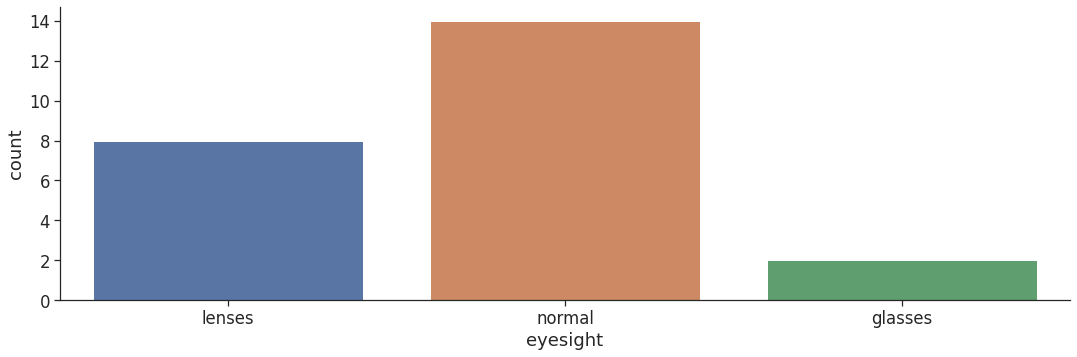

In [ ]:
# Age and gender
print(df_survey['age'].describe().round(1).loc[['mean', 'std', 'min', 'max']], '\n') 

print(df_survey['gender'].value_counts(), '\n')

print(df_survey['dominant_hand'].value_counts(), '\n')


print(df_survey['eyesight'].value_counts())
g = sns.catplot(kind='count', data=df_survey, x='eyesight', aspect=3, height=0.5)
